# **IPL Team performance Evaluation (Mumbai Indians)**

# 1.1 Importing Libraries

In [53]:
# Install category_encoders if not already installed
%pip install category_encoders
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import category_encoders as ce
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#1.2 Loding The Data Sets

In [54]:
# Load the datasets
#from google.colab import drive
#drive.mount("/content/drive")


In [55]:
#!apt-get install git


In [56]:
!git clone https://github.com/jalilrohi1/IplWinPredict.git


Cloning into 'IplWinPredict'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 73 (delta 33), reused 20 (delta 5), pack-reused 0
Receiving objects: 100% (73/73), 14.68 MiB | 5.60 MiB/s, done.
Resolving deltas: 100% (33/33), done.


In [57]:
%cd IplWinPredict

/content/IplWinPredict/IplWinPredict


In [58]:
#path_matchDataSet ='/content/drive/MyDrive/Colab Notebooks/iplDataSet/matches.csv'
#path_deliveryDataSet='/content/drive/MyDrive/Colab Notebooks/iplDataSet/deliveries.csv'
path_matchDataSet = 'data/matches.csv'
#path_matchDataSet1 = 'data/matches1.csv'
path_deliveryDataSet='data/deliveries.csv'
#path_deliveryDataSet1='data/deliveries1.csv'
ipl_matches = pd.read_csv(path_matchDataSet)
ipl_delivery =pd.read_csv(path_deliveryDataSet)
#ipl_matches1 = pd.read_csv(path_matchDataSet1)
#ipl_delivery1 =pd.read_csv(path_deliveryDataSet1)

<ipython-input-58-22ea0a8170ab>:8: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  ipl_delivery =pd.read_csv(path_deliveryDataSet)


In [59]:
#to Save Data Back in the Drive
#ipl_matches.to_csv(path_matchDataSet, index=False)
#ipl_delivery.to_csv(path_deliveryDataSet, index=False)

# **1.3 Exploring and Analyzing the DataSet**

In [60]:
# Display the first few rows of each dataset to understand their structure
ipl_matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,980917,2016,Mumbai,2016-04-16,League,AJ Finch,Wankhede Stadium,Mumbai Indians,Gujarat Lions,Gujarat Lions,field,Gujarat Lions,wickets,3.0,144.0,20.0,N,NaN,HDPK Dharmasena,VK Sharma
1,598032,2013,Jaipur,2013-04-27,League,JP Faulkner,Sawai Mansingh Stadium,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Rajasthan Royals,wickets,8.0,145.0,20.0,N,NaN,VA Kulkarni,K Srinath
2,734023,2014,Kolkata,2014-05-20,League,RV Uthappa,Eden Gardens,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,8.0,155.0,20.0,N,NaN,RM Deshpande,C Shamshuddin
3,336014,2007/08,Hyderabad,2008-05-11,League,SC Ganguly,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Kolkata Knight Riders,Kolkata Knight Riders,bat,Kolkata Knight Riders,runs,23.0,205.0,20.0,N,NaN,IL Howell,AM Saheba
4,1082633,2017,Bangalore,2017-05-05,League,Sandeep Sharma,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,field,Kings XI Punjab,runs,19.0,139.0,20.0,N,NaN,CB Gaffaney,C Shamshuddin


In [61]:
ipl_delivery.head()


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,player_dismissed,dismissal_kind,fielder,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,DA Warner
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,DA Warner
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,DA Warner
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,DA Warner
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,NaN,NaN,NaN,0.0,2.0,0.0,0.0,0.0,0.0,DA Warner


In [62]:
ipl_matches.shape

(819, 20)

In [63]:
ipl_delivery.shape

(194952, 24)

In [64]:
ipl_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               819 non-null    int64  
 1   season           819 non-null    object 
 2   city             778 non-null    object 
 3   date             819 non-null    object 
 4   match_type       819 non-null    object 
 5   player_of_match  815 non-null    object 
 6   venue            819 non-null    object 
 7   team1            819 non-null    object 
 8   team2            819 non-null    object 
 9   toss_winner      819 non-null    object 
 10  toss_decision    819 non-null    object 
 11  winner           815 non-null    object 
 12  result           819 non-null    object 
 13  result_margin    804 non-null    float64
 14  target_runs      817 non-null    float64
 15  target_overs     817 non-null    float64
 16  super_over       819 non-null    object 
 17  method          

**Things observed from Match info.**

**Date column** - wrong Datatype. it should be Datetime but it is object

**Season Column** - Wrong Datatype and error in values. it should be int / categorical but it is object.

Additional points that can be done on the dataframe
The Following columns are in object format but it can be converted to Categorical.

**1.City 2.Season 3.Team1 4.Team2 5.Toss_Winner 6Toss_Decision 7.Winner 8.Result 9.Venue**

In [65]:
ipl_delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194952 entries, 0 to 194951
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          194952 non-null  int64  
 1   inning            194952 non-null  int64  
 2   batting_team      194952 non-null  object 
 3   bowling_team      194952 non-null  object 
 4   over              194952 non-null  int64  
 5   ball              194952 non-null  int64  
 6   batter            194952 non-null  object 
 7   bowler            194952 non-null  object 
 8   non_striker       194952 non-null  object 
 9   batsman_runs      194952 non-null  int64  
 10  extra_runs        194952 non-null  int64  
 11  total_runs        194952 non-null  int64  
 12  extras_type       10403 non-null   object 
 13  is_wicket         194952 non-null  int64  
 14  player_dismissed  9634 non-null    object 
 15  dismissal_kind    9634 non-null    object 
 16  fielder           69


**Things observed from the deliveries.**
All the columns appear to be in correct Datatype format.
Additional Things that can be done on dataframe Following is the list of column in int64 / object. we can convert them into Categorical columns

**1.Innings 2.Over 3.Ball 4.batsman_runs 5.Extras_type 6.is_wicket 7.dismissal_kind**


# **2.1 Data Preprocessing**



# **2.1.1 Checking for null values**


In [66]:
#Exporting the Data to clipboard then to excel
#ipl_matches.to_clipboard(index=False)
#ipl_delivery.to_clipboard(index=False)

### **2.1 Handling Missing Values (Match Dataset)**

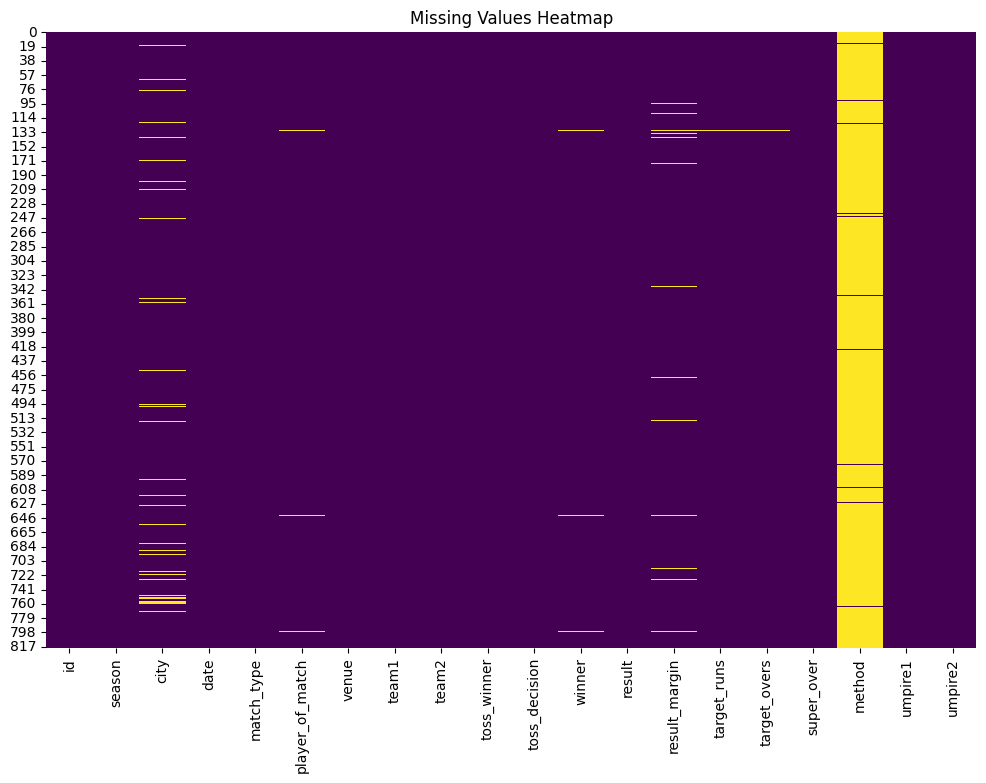

In [67]:
# Assuming data is your IPL DataFrame
plt.figure(figsize=(12, 8))
sns.heatmap(ipl_matches.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [68]:
ipl_matches.isnull().sum()

id                   0
season               0
city                41
date                 0
match_type           0
player_of_match      4
venue                0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               0
result_margin       15
target_runs          2
target_overs         2
super_over           0
method             803
umpire1              0
umpire2              0
dtype: int64

**city:** This column has **41** missing values. We can fill these missing values with 'Unknown' but I decided to analyze the data in excel aftwer looking at data I found That The city where we have nan values, then staiums are Dubai International Cricket Stadium - Dubai
Sharjah Cricket Stadium - Sharjahso we will fill it whit respect to the **venue.**

**player_of_match**, **winner:** These columns have **4** missing values each. These can be left as is or filled with 'Unknown' for simplicity, but after analysis the data I found that if there is no winner then the match doesn't played between the teams and no player of the match exits, so **I decided to delete these five rows.**

**result_margin:** This column has **15** missing values. Since result margin is important, after analysis I found that the match has **Tied** between the teams, **So we can fill missing values with 0.**

**target_runs**, **target_overs:** These columns have **2** missing values each. It might be due to incomplete matches or no results. **Fill these with 0.** but when** I delete the Plyer of the match the it will be deleted because these** are related with them

**method:** This column has **803** missing values. Since this is not relevant for most analyses, **we can drop this column.**

In [69]:
#Replacing the City with respect to the Venue
for index, row in ipl_matches.iterrows():
  if row['venue'] == 'Dubai International Cricket Stadium':
    ipl_matches.at[index, 'city'] = 'Dubai'
  elif row['venue'] == 'Sharjah Cricket Stadium':
    ipl_matches.at[index,'city'] = 'Sharjah'

In [70]:
#Drop rows with null 'winner', player of the match and target runs and target overs
ipl_matches = ipl_matches.dropna(subset=['winner'])

In [71]:
ipl_matches['result_margin'] = ipl_matches['result_margin'].fillna(0)


<ipython-input-71-9ff6c0d35657>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipl_matches['result_margin'] = ipl_matches['result_margin'].fillna(0)


In [72]:
# Filter out matches where D/L method was applied
ipl_matches = ipl_matches[ipl_matches['method'] != 'D/L']
#filling the method with 0
ipl_matches['method'] = ipl_matches['method'].fillna(0)
# Now you can work with the filtered DataFrame 'filtered_matches'
(ipl_matches.head())

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,980917,2016,Mumbai,2016-04-16,League,AJ Finch,Wankhede Stadium,Mumbai Indians,Gujarat Lions,Gujarat Lions,field,Gujarat Lions,wickets,3.0,144.0,20.0,N,0,HDPK Dharmasena,VK Sharma
1,598032,2013,Jaipur,2013-04-27,League,JP Faulkner,Sawai Mansingh Stadium,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Rajasthan Royals,wickets,8.0,145.0,20.0,N,0,VA Kulkarni,K Srinath
2,734023,2014,Kolkata,2014-05-20,League,RV Uthappa,Eden Gardens,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,8.0,155.0,20.0,N,0,RM Deshpande,C Shamshuddin
3,336014,2007/08,Hyderabad,2008-05-11,League,SC Ganguly,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Kolkata Knight Riders,Kolkata Knight Riders,bat,Kolkata Knight Riders,runs,23.0,205.0,20.0,N,0,IL Howell,AM Saheba
4,1082633,2017,Bangalore,2017-05-05,League,Sandeep Sharma,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,field,Kings XI Punjab,runs,19.0,139.0,20.0,N,0,CB Gaffaney,C Shamshuddin


In [73]:
# Drop 'method' column as it has too many missing values
ipl_matches.drop(columns=['method'], inplace=True)


In [74]:
ipl_matches[ipl_matches['target_overs'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2


In [75]:
ipl_matches.isnull().sum()

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
umpire1            0
umpire2            0
dtype: int64

### **2.2 Handling Missing Values (Delivery Dataset)**

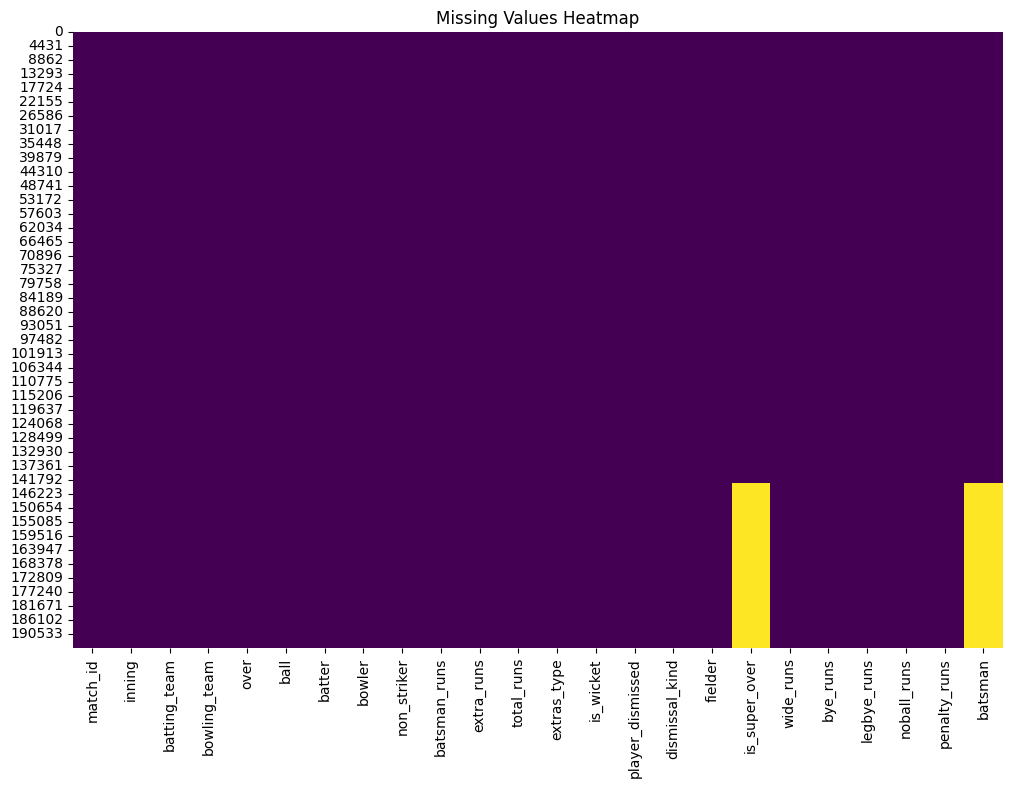

In [136]:
#data is  IPL Deliveries
plt.figure(figsize=(12, 8))
sns.heatmap(ipl_delivery.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

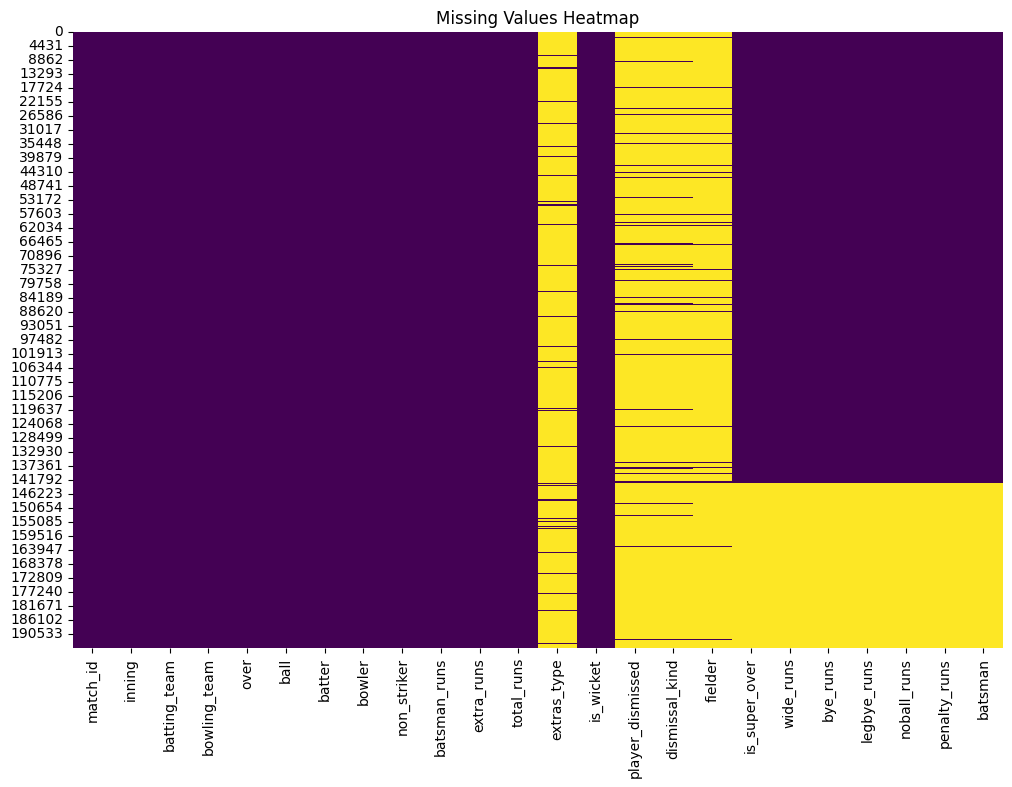

In [76]:
#data is  IPL Deliveries
plt.figure(figsize=(12, 8))
sns.heatmap(ipl_delivery.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [77]:
ipl_delivery.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         184549
is_wicket                0
player_dismissed    185318
dismissal_kind      185318
fielder             188050
is_super_over        52108
wide_runs            52108
bye_runs             52108
legbye_runs          52108
noball_runs          52108
penalty_runs         52108
batsman              52108
dtype: int64


**extras_type, player_dismissed, dismissal_kind, fielder ...:** These columns have many missing values because they are relevant only when specific events occur. We can fill these with **'None'**, & fill **wide_runs, bye_runs, legbye_runs, noball_runs, penalty_runs** with **0**

In [78]:
# Fill the specified columns with 0
columns_to_fill = ['wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs']
ipl_delivery[columns_to_fill] = ipl_delivery[columns_to_fill].fillna(0)

In [79]:
# Fill 'batsman' with 'None'
ipl_delivery['batsman'] = ipl_delivery['batsman'].fillna('None')

In [80]:
ipl_delivery['batsman'].unique()

array(['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuvraj Singh',
       'DJ Hooda', 'BCJ Cutting', 'CH Gayle', 'Mandeep Singh', 'TM Head',
       'KM Jadhav', 'SR Watson', 'Sachin Baby', 'STR Binny', 'MS Dhoni',
       'SPD Smith', 'JJ Roy', 'BB McCullum', 'SK Raina', 'AJ Finch',
       'KD Karthik', 'G Gambhir', 'CA Lynn', 'AM Rahane', 'MA Agarwal',
       'BA Stokes', 'MK Tiwary', 'DT Christian', 'HM Amla', 'M Vohra',
       'WP Saha', 'AR Patel', 'GJ Maxwell', 'DA Miller', 'RR Pant',
       'PJ Cummins', 'A Mishra', 'S Nadeem', 'Z Khan', 'DR Smith',
       'DS Kulkarni', 'P Kumar', 'Basil Thampi', 'RV Uthappa',
       'MK Pandey', 'YK Pathan', 'SA Yadav', 'CR Woakes', 'SP Narine',
       'PA Patel', 'JC Buttler', 'N Rana', 'RG Sharma', 'KH Pandya',
       'KA Pollard', 'HH Pandya', 'Harbhajan Singh', 'Vishnu Vinod',
       'AB de Villiers', 'AP Tare', 'SW Billings', 'SV Samson',
       'CJ Anderson', 'CH Morris', 'F du Plessis', 'RA Tripathi',
       'R Bhatia', 'DL Chahar', 'A Zampa

In [81]:
ipl_delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,player_dismissed,dismissal_kind,fielder,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,DA Warner
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,DA Warner
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,DA Warner
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,DA Warner
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,NaN,NaN,NaN,0.0,2.0,0.0,0.0,0.0,0.0,DA Warner


In [82]:
# Fill 'extras_type', 'player_dismissed', 'dismissal_kind', and 'fielder' with 'None' where they are missing
ipl_delivery['extras_type'] = ipl_delivery['extras_type'].fillna('None')
ipl_delivery['fielder'] = ipl_delivery['fielder'].fillna('None')
ipl_delivery['dismissal_kind'] = ipl_delivery['dismissal_kind'].fillna('None')
# Verify the changes
ipl_delivery.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type              0
is_wicket                0
player_dismissed    185318
dismissal_kind           0
fielder                  0
is_super_over        52108
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman                  0
dtype: int64

In [83]:
# First, fill the missing values with a placeholder string
ipl_delivery['player_dismissed'] = ipl_delivery['player_dismissed'].fillna("unknown")


In [84]:
# Then, convert the entire column to string type
ipl_delivery['player_dismissed'] = ipl_delivery['player_dismissed'].astype(str)

In [85]:
# Now, replace the placeholder with "0" and create the binary feature
ipl_delivery['player_dismissed'] = ipl_delivery['player_dismissed'].replace("unknown", "0")

In [86]:
#Now we should Convert them to zero, and one
ipl_delivery['player_dismissed'] = ipl_delivery['player_dismissed'].apply(lambda x: 1 if x != "0" else 0)

## **2.3 Handeling Duplicates and Searching for anomalies in data**

### **2.2.1 Matche data Set**

In [87]:
ipl_matches.duplicated().sum()

0

In [88]:
ipl_matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'umpire1', 'umpire2'],
      dtype='object')

In [89]:
ipl_matches['team1'].unique()

array(['Mumbai Indians', 'Rajasthan Royals', 'Kolkata Knight Riders',
       'Deccan Chargers', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Delhi Daredevils',
       'Pune Warriors', 'Sunrisers Hyderabad', 'Punjab Kings',
       'Rising Pune Supergiant', 'Gujarat Titans', 'Kochi Tuskers Kerala',
       'Delhi Capitals', 'Rising Pune Supergiants',
       'Lucknow Super Giants', 'Gujarat Lions'], dtype=object)

In [90]:
ipl_matches['team2'].unique()

array(['Gujarat Lions', 'Sunrisers Hyderabad', 'Chennai Super Kings',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Delhi Capitals', 'Rajasthan Royals', 'Deccan Chargers',
       'Royal Challengers Bangalore', 'Pune Warriors',
       'Lucknow Super Giants', 'Mumbai Indians', 'Kochi Tuskers Kerala',
       'Gujarat Titans', 'Punjab Kings', 'Rising Pune Supergiants',
       'Rising Pune Supergiant'], dtype=object)

There is a team repreated Twice.

Rising Pune Supergiants - Rising Pune Supergiant
Teams name has been replaced

Delhi Daredevils - Delhi Capitals

Punjab Kings - Kings XI Punjab

In [91]:
# Changing the Names.
team_names = {'Rising Pune Supergiant':'Rising Pune Supergiants','Delhi Daredevils':'Delhi Capitals','Kings XI Punjab':'Punjab Kings'}


In [92]:
ipl_matches['team1'] = ipl_matches['team1'].replace(team_names)

ipl_matches['team2'] = ipl_matches['team2'].replace(team_names)

In [93]:
ipl_matches['team2'].unique()

array(['Gujarat Lions', 'Sunrisers Hyderabad', 'Chennai Super Kings',
       'Kolkata Knight Riders', 'Punjab Kings', 'Delhi Capitals',
       'Rajasthan Royals', 'Deccan Chargers',
       'Royal Challengers Bangalore', 'Pune Warriors',
       'Lucknow Super Giants', 'Mumbai Indians', 'Kochi Tuskers Kerala',
       'Gujarat Titans', 'Rising Pune Supergiants'], dtype=object)

In [94]:
ipl_matches['venue'].unique()

array(['Wankhede Stadium', 'Sawai Mansingh Stadium', 'Eden Gardens',
       'Rajiv Gandhi International Stadium, Uppal',
       'M Chinnaswamy Stadium', 'JSCA International Stadium Complex',
       'M.Chinnaswamy Stadium', 'SuperSport Park', 'Newlands',
       'Arun Jaitley Stadium', 'OUTsurance Oval',
       'Subrata Roy Sahara Stadium', 'Feroz Shah Kotla',
       'Sharjah Cricket Stadium', 'Wankhede Stadium, Mumbai',
       'Punjab Cricket Association Stadium, Mohali',
       'MA Chidambaram Stadium', 'Brabourne Stadium, Mumbai',
       'Arun Jaitley Stadium, Delhi',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Sawai Mansingh Stadium, Jaipur', 'Sheikh Zayed Stadium',
       'MA Chidambaram Stadium, Chepauk',
       'Maharashtra Cricket Association Stadium',
       'M Chinnaswamy Stadium, Bengaluru',
       'Maharashtra Cricket Association Stadium, Pune',
       'Dr DY Patil Sports Academy, Mumbai', 'Kingsmead',
       'Dr DY Patil Sports Academy',
       'Du

**The Following values are Duplicate**

Wankhede Stadium - Wankhede Stadium, Mumbai

Brabourne Stadium - Brabourne Stadium, Mumbai

Eden Gardens - Eden Gardens, Kolkata

Arun Jaitley Stadium - Arun Jaitley Stadium, Delhi

Punjab Cricket Association IS Bindra Stadium - Punjab Cricket Association IS Bindra Stadium, Mohali

Maharashtra Cricket Association Stadium - Maharashtra Cricket Association Stadium, Pune

Rajiv Gandhi International Stadium - Rajiv Gandhi International Stadium, Uppal

Dr DY Patil Sports Academy - Dr DY Patil Sports Academy, Mumbai

MA Chidambaram Stadium - MA Chidambaram Stadium, Chepauk -MA Chidambaram Stadium, Chepauk, Chennail

Arun Jaitley Stadium - Arun Jaitley Stadium, Delhi

Zayed Cricket Stadium, Abu Dhabi - Sheikh Zayed Stadium

In [95]:
venue_dict = {'Wankhede Stadium, Mumbai':'Wankhede Stadium','Brabourne Stadium, Mumbai':'Brabourne Stadium',
              'Eden Gardens, Kolkata':'Eden Gardens','Arun Jaitley Stadium, Delhi':'Arun Jaitley Stadium',
              'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association IS Bindra Stadium',
              'Maharashtra Cricket Association Stadium, Pune':'Maharashtra Cricket Association Stadium',
              'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium','Dr DY Patil Sports Academy, Mumbai':
              'Dr DY Patil Sports Academy','Arun Jaitley Stadium, Delhi':'Arun Jaitley Stadium','Zayed Cricket Stadium, Abu Dhabi':
              'Sheikh Zayed Stadium','MA Chidambaram Stadium, Chepauk':'MA Chidambaram Stadium','MA Chidambaram Stadium, Chepauk, Chennail':
              'MA Chidambaram Stadium','Narendra Modi Stadium, Ahmedabad':'Narendra Modi Stadium'}

ipl_matches['venue'] = ipl_matches['venue'].replace(venue_dict)

In [96]:
ipl_matches['toss_winner'].unique()

array(['Gujarat Lions', 'Sunrisers Hyderabad', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Chennai Super Kings',
       'Delhi Daredevils', 'Delhi Capitals', 'Mumbai Indians',
       'Kings XI Punjab', 'Deccan Chargers', 'Pune Warriors',
       'Rajasthan Royals', 'Rising Pune Supergiant',
       'Lucknow Super Giants', 'Gujarat Titans', 'Punjab Kings',
       'Kochi Tuskers Kerala', 'Rising Pune Supergiants'], dtype=object)

**There is a team repreated Twice.**

Rising Pune Supergiants - Rising Pune Supergiant

**Teams name has been replaced**

Delhi Daredevils - Delhi Capitals

Punjab Kings - Kings XI Punjab

In [97]:
ipl_matches['toss_winner'] = ipl_matches['toss_winner'].replace(team_names)

In [98]:
ipl_matches['winner'].unique()

array(['Gujarat Lions', 'Rajasthan Royals', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Sunrisers Hyderabad',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Delhi Capitals', 'Mumbai Indians', 'Deccan Chargers',
       'Chennai Super Kings', 'Punjab Kings', 'Rising Pune Supergiant',
       'Lucknow Super Giants', 'Gujarat Titans', 'Kochi Tuskers Kerala',
       'Pune Warriors', 'Rising Pune Supergiants'], dtype=object)

**There is a team repreated Twice.** Rising Pune Supergiants - Rising Pune Supergiant

**Teams name has been replaced**

Delhi Daredevils - Delhi Capitals

Punjab Kings - Kings XI Punjab

In [99]:
ipl_matches['winner'] = ipl_matches['winner'].replace(team_names)

In [100]:
ipl_delivery.duplicated().sum()

0

**Resolving the Error in data 2009/02 to 2009**

In [101]:
# Remove '/' and digits after '/' in 'season' column
ipl_matches['season'] = ipl_matches['season'].apply(lambda x: x.split('/')[0] if '/' in x else x)

# Print the result
ipl_matches['season'].unique()

array(['2016', '2013', '2014', '2007', '2017', '2019', '2009', '2018',
       '2012', '2022', '2023', '2011', '2021', '2015', '2020'],
      dtype=object)

## **2.3 Data Transfermation**

### **Matches Data Set**

date: Should be converted **from object to datetime**.

**The following Should be converted from object to categorical:**

season, match_type, player_of_match, venue, team1, team2, toss_winner, toss_decision, winner, result, super_over, umpire1, umpire2


In [102]:
# Convert 'date' to datetime
ipl_matches['date'] = pd.to_datetime(ipl_matches['date'])

# Convert columns to categorical type
categorical_columns_matches = ['season','city', 'match_type', 'player_of_match', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result', 'super_over', 'umpire1', 'umpire2']
ipl_matches[categorical_columns_matches] = ipl_matches[categorical_columns_matches].astype('category')

# Verify the changes
print(ipl_matches.info())

<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 0 to 818
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               799 non-null    int64         
 1   season           799 non-null    category      
 2   city             799 non-null    category      
 3   date             799 non-null    datetime64[ns]
 4   match_type       799 non-null    category      
 5   player_of_match  799 non-null    category      
 6   venue            799 non-null    category      
 7   team1            799 non-null    category      
 8   team2            799 non-null    category      
 9   toss_winner      799 non-null    category      
 10  toss_decision    799 non-null    category      
 11  winner           799 non-null    category      
 12  result           799 non-null    category      
 13  result_margin    799 non-null    float64       
 14  target_runs      799 non-null    float64       

### **Delivery Data Set**

**The following Should be converted from object to categorical:**

extras_type, player_dismissed, dismissal_kind, fielder

In [103]:
# Convert columns in df_ipl_delivery to categorical type
categorical_columns_delivery = ['batting_team','bowling_team', 'player_dismissed', 'dismissal_kind', 'fielder']
ipl_delivery[categorical_columns_delivery] = ipl_delivery[categorical_columns_delivery].astype('category')

# Verify the changes
print(ipl_delivery.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194952 entries, 0 to 194951
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   match_id          194952 non-null  int64   
 1   inning            194952 non-null  int64   
 2   batting_team      194952 non-null  category
 3   bowling_team      194952 non-null  category
 4   over              194952 non-null  int64   
 5   ball              194952 non-null  int64   
 6   batter            194952 non-null  object  
 7   bowler            194952 non-null  object  
 8   non_striker       194952 non-null  object  
 9   batsman_runs      194952 non-null  int64   
 10  extra_runs        194952 non-null  int64   
 11  total_runs        194952 non-null  int64   
 12  extras_type       194952 non-null  object  
 13  is_wicket         194952 non-null  int64   
 14  player_dismissed  194952 non-null  category
 15  dismissal_kind    194952 non-null  category
 16  fi

# **3 Data Visualization**

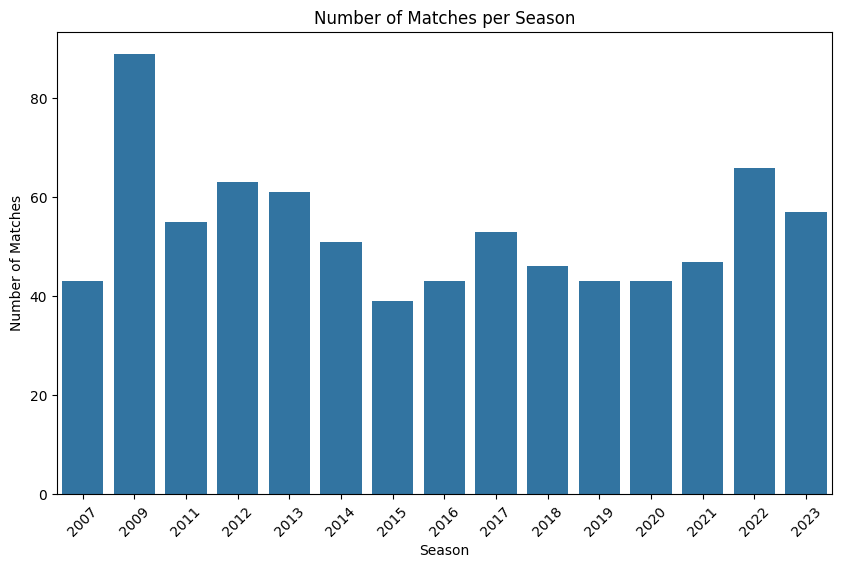

In [104]:
# Number of Matches per Season
plt.figure(figsize=(10, 6))
sns.countplot(data=ipl_matches, x='season')
plt.title('Number of Matches per Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()


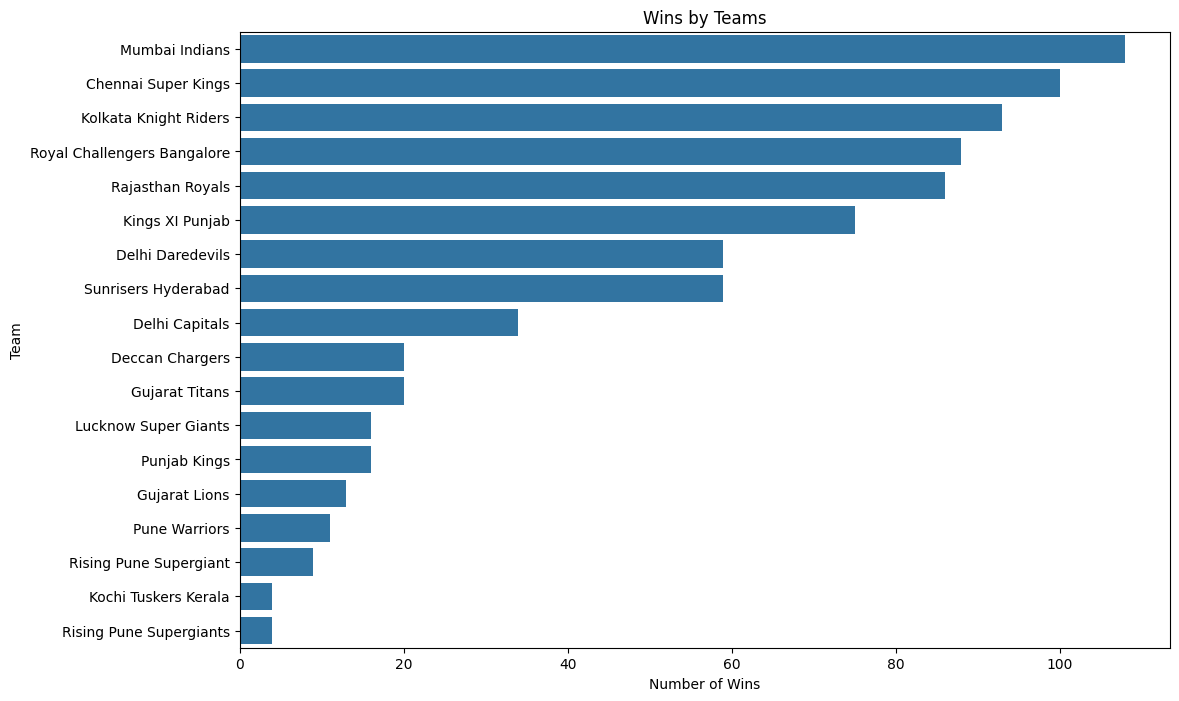

In [16]:
# Wins by Teams
plt.figure(figsize=(12, 8))
sns.countplot(data=ipl_matches, y='winner', order=ipl_matches['winner'].value_counts().index)
plt.title('Wins by Teams')
plt.xlabel('Number of Wins')
plt.ylabel('Team')
plt.show()

<ipython-input-17-2ebb35dcfcbd>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='wickets', y='bowler', data=bowler_wickets, palette='viridis')


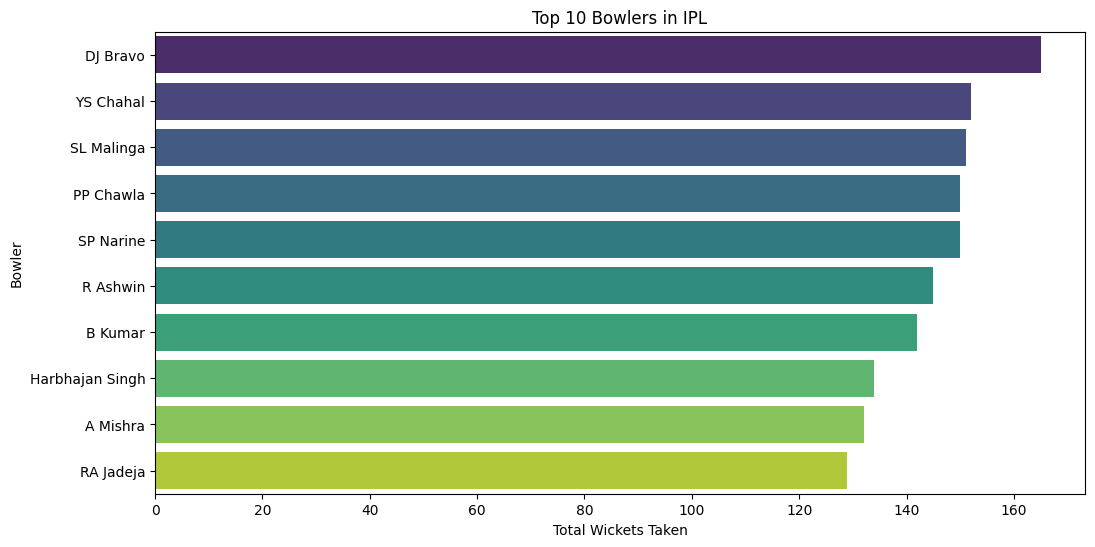

In [17]:
# Filter data for deliveries that resulted in a wicket
# Check if 'dismissal_kind' column exists and filter based on non-null values
wickets = ipl_delivery[ipl_delivery['dismissal_kind'].notna()]

# Calculate total wickets taken by each bowler
bowler_wickets = wickets.groupby('bowler').size().reset_index(name='wickets')
bowler_wickets = bowler_wickets.sort_values(by='wickets', ascending=False).head(10)

# Plot top 10 bowlers
plt.figure(figsize=(12, 6))
sns.barplot(x='wickets', y='bowler', data=bowler_wickets, palette='viridis')
plt.title('Top 10 Bowlers in IPL')
plt.xlabel('Total Wickets Taken')
plt.ylabel('Bowler')
plt.show()

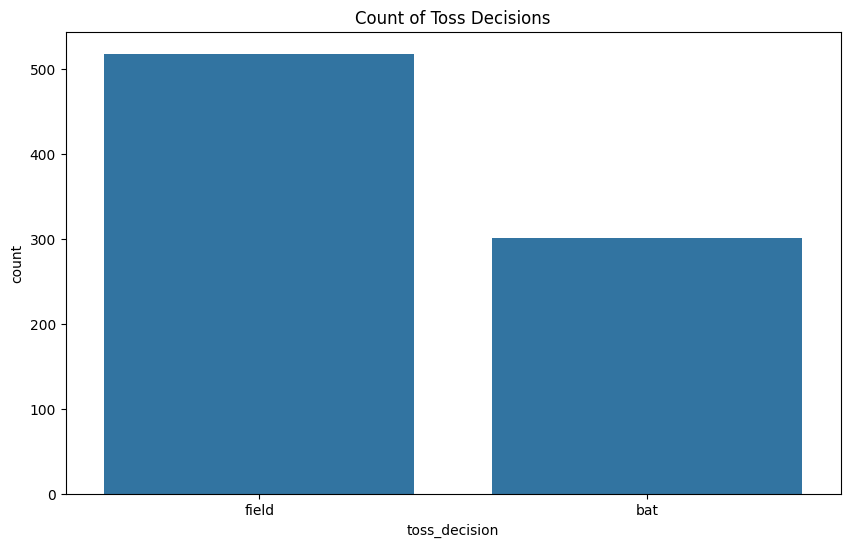

In [18]:
# Bar chart for toss decisions
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_decision', data=ipl_matches)
plt.title('Count of Toss Decisions')
plt.show()

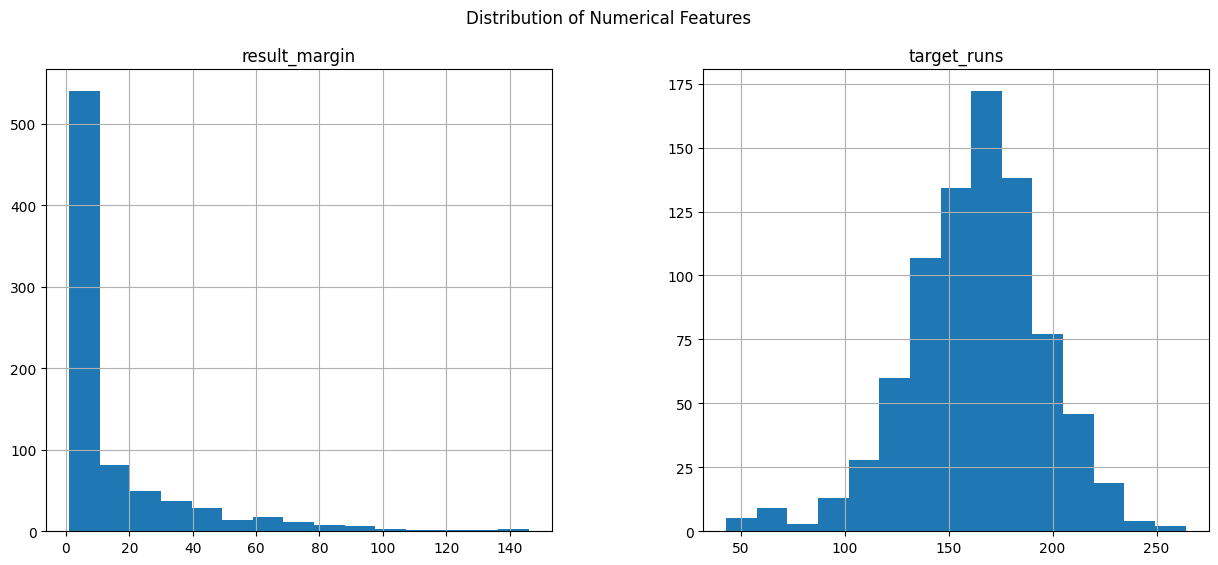

In [19]:
# Plotting histograms for numerical features
numerical_features = ['result_margin', 'target_runs']
ipl_matches[numerical_features].hist(bins=15, figsize=(15, 6), layout=(1, 2))
plt.suptitle('Distribution of Numerical Features')
plt.show()

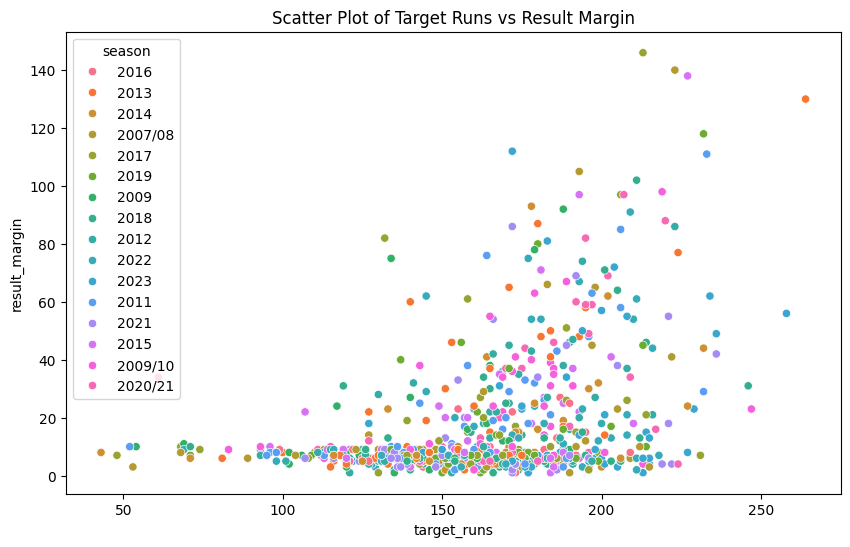

In [20]:
# Scatter plot to explore the relationship between result_margin and target_runs
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ipl_matches, x='target_runs', y='result_margin', hue='season')
plt.title('Scatter Plot of Target Runs vs Result Margin')
plt.show()

<Axes: xlabel='over'>

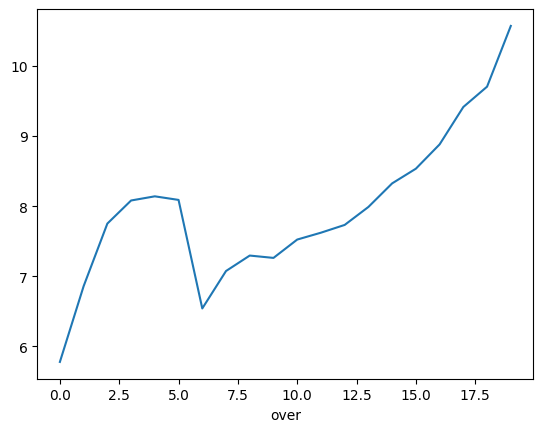

In [21]:
# Average runs in an over (All seasons combined)
(ipl_delivery.groupby('over')['total_runs'].mean()*6).plot(kind = 'line')

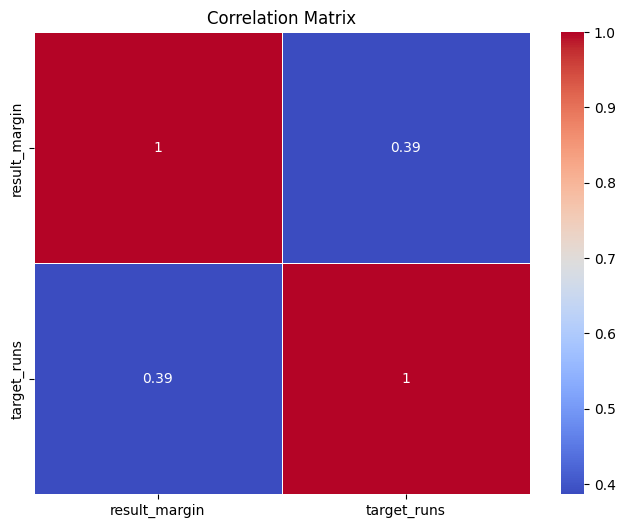

In [22]:
# Compute the correlation matrix
correlation_matrix = ipl_matches[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


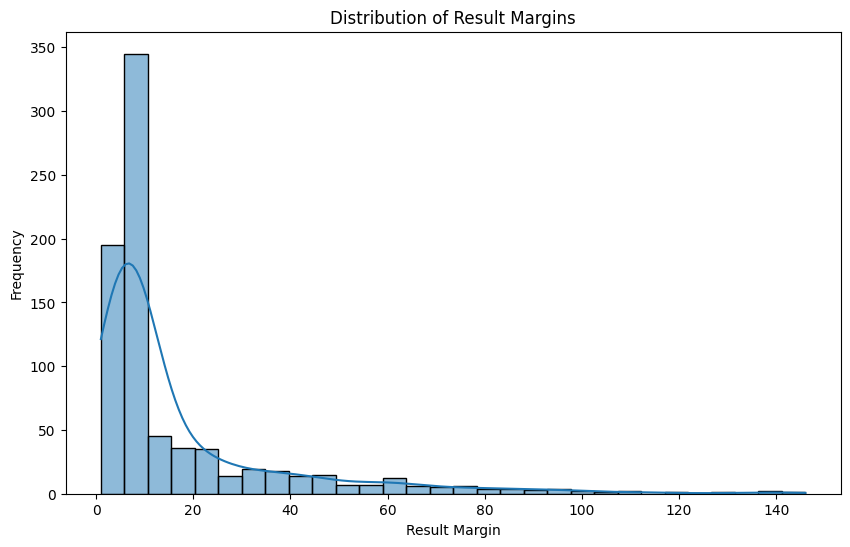

In [23]:
# Distribution of Result Margins
plt.figure(figsize=(10, 6))
sns.histplot(data=ipl_matches, x='result_margin', bins=30, kde=True)
plt.title('Distribution of Result Margins')
plt.xlabel('Result Margin')
plt.ylabel('Frequency')
plt.show()

# **4 Feature Engineering**

In [62]:
# Convert total_runs to numeric if it is not already
#if ipl_delivery['total_runs'].dtype == 'category':
ipl_delivery['total_runs'] = pd.to_numeric(ipl_delivery['total_runs'])

In [63]:
# Convert total_runs to numeric, overwriting if it was category type
ipl_delivery['total_runs'] = pd.to_numeric(ipl_delivery['total_runs'], errors='coerce')

#Creating  a total Runs Feature
total_score_df = ipl_delivery.groupby(['match_id','inning'])['total_runs'].sum().reset_index() # Removed .sum() from the groupby object

#We Need Only the First Inning Total Runs
total_score_df = total_score_df[total_score_df['inning'] == 1]
match_df= ipl_matches
#Merging the Total Run Feature to The Data Set
match_df = ipl_matches.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [64]:
# we should pickup those fields which are required for predection and Merge it with the Delivery Data Set
match_df = match_df[['match_id','city','winner','total_runs']]

## Merging the Data Sets

In [65]:
#Merge both Data sets
delivery_df = match_df.merge(ipl_delivery,on='match_id')

In [66]:
#we Need only Second Innings Data
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [67]:
delivery_df.dtypes

match_id               int64
city                category
winner              category
total_runs_x           int64
inning                 int64
batting_team        category
bowling_team        category
over                   int64
ball                   int64
batter                object
bowler                object
non_striker           object
batsman_runs           int64
extra_runs             int64
total_runs_y           int64
extras_type           object
is_wicket              int64
player_dismissed    category
dismissal_kind      category
fielder             category
is_super_over        float64
wide_runs            float64
bye_runs             float64
legbye_runs          float64
noball_runs          float64
penalty_runs         float64
batsman               object
dtype: object

In [68]:
delivery_df.total_runs_y.isnull().sum()

0

In [69]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,player_dismissed,dismissal_kind,fielder,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman
127,980917,Mumbai,Gujarat Lions,143,2,Gujarat Lions,Mumbai Indians,0,1,AJ Finch,...,0,None,None,0.0,0.0,0.0,0.0,0.0,0.0,V Kohli
128,980917,Mumbai,Gujarat Lions,143,2,Gujarat Lions,Mumbai Indians,0,2,AJ Finch,...,0,None,None,0.0,0.0,0.0,0.0,0.0,0.0,V Kohli
129,980917,Mumbai,Gujarat Lions,143,2,Gujarat Lions,Mumbai Indians,0,3,AJ Finch,...,0,None,None,0.0,0.0,0.0,0.0,0.0,0.0,V Kohli
130,980917,Mumbai,Gujarat Lions,143,2,Gujarat Lions,Mumbai Indians,0,4,BB McCullum,...,0,None,None,0.0,1.0,0.0,0.0,0.0,0.0,V Kohli
131,980917,Mumbai,Gujarat Lions,143,2,Gujarat Lions,Mumbai Indians,0,5,BB McCullum,...,0,None,None,0.0,0.0,0.0,0.0,0.0,0.0,V Kohli
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191697,1254110,Dubai,Delhi Capitals,136,2,Delhi Capitals,Chennai Super Kings,19,1,SO Hetmyer,...,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191698,1254110,Dubai,Delhi Capitals,136,2,Delhi Capitals,Chennai Super Kings,19,2,SO Hetmyer,...,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191699,1254110,Dubai,Delhi Capitals,136,2,Delhi Capitals,Chennai Super Kings,19,3,AR Patel,...,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191700,1254110,Dubai,Delhi Capitals,136,2,Delhi Capitals,Chennai Super Kings,19,4,AR Patel,...,1,caught,MM Ali,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
delivery_df['total_runs_y'].fillna(0, inplace=True)


In [71]:
# Convert 'total_runs_y' to a numeric type before calculating the cumulative sum
delivery_df['total_runs_y'] = delivery_df['total_runs_y'].astype(int)  # or float, depending on your data

# Now calculate the current score
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [72]:
#Remaining Runs
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [73]:
#Remaining Balls
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [74]:
delivery_df['player_dismissed'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [75]:
#Wickets On hand
# Convert to numeric type before calculating cumulative sum
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')  # Ensure 'player_dismissed' is numeric

wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values
delivery_df['wicketsOnHand'] = 10 - wickets

In [76]:
# crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [77]:
#Required Run Rate
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [78]:
#function for converting of result to 0 and 1
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [79]:
#Coverting the data of result to 0 and 1
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [80]:
#Feature Selection for the final model
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wicketsOnHand','total_runs_x','crr','rrr','result']]

In [81]:
final_df = final_df.sample(final_df.shape[0])

In [82]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wicketsOnHand,total_runs_x,crr,rrr,result
46175,Kings XI Punjab,Delhi Capitals,Dubai,94,80,7,164,10.5,7.05,0


In [83]:
final_df.dropna(inplace=True)

In [84]:
final_df = final_df[final_df['balls_left'] != 0]

In [85]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92673 entries, 79458 to 27356
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   batting_team   92673 non-null  category
 1   bowling_team   92673 non-null  category
 2   city           92673 non-null  category
 3   runs_left      92673 non-null  int64   
 4   balls_left     92673 non-null  int64   
 5   wicketsOnHand  92673 non-null  int64   
 6   total_runs_x   92673 non-null  int64   
 7   crr            92673 non-null  float64 
 8   rrr            92673 non-null  float64 
 9   result         92673 non-null  int64   
dtypes: category(3), float64(2), int64(5)
memory usage: 5.9 MB


# **5 Model Selection & Evaluation**

## **Step 1:Data Preparation**

First, let's extract the features and target variable from your final_df DataFrame. You mentioned you want to use batting_team, bowling_team, and city to predict the winner.

In [86]:
# ... (Your existing code for defining categorical_features, numerical_features, and transformer)

# Select features (excluding 'result' or 'winner')
features = ['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wicketsOnHand', 'total_runs_x', 'crr', 'rrr']
X = final_df[features]

## **Step 2: Handling Categorical Features**
Since our features are categorical, we need to encode them numerically for the machine learning models to understand. We can use one-hot encoding for this:

In [87]:
# Separate categorical and numerical features
categorical_features = ['batting_team', 'bowling_team', 'city']
numerical_features = ['runs_left', 'balls_left', 'wicketsOnHand', 'total_runs_x', 'crr', 'rrr']


# Create the ColumnTransformer
transformer = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('onehot', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'),
     categorical_features)
], remainder='passthrough')

# Separate numerical and categorical features
X_numerical = X[numerical_features]
X_categorical = X[categorical_features]

# Replace infinite values with a large finite number or NaN and then fill NaNs in numerical features only
X_numerical_replaced = X_numerical.replace([np.inf, -np.inf], np.nan).fillna(X_numerical.replace([np.inf, -np.inf], np.nan).max())

# Recombine numerical and categorical features
X_replaced = pd.concat([X_numerical_replaced, X_categorical], axis=1)

# Apply the transformer
X_encoded = transformer.fit_transform(X_replaced)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [88]:
# Handle potential infinite/large values
X_encoded = np.nan_to_num(X_encoded, posinf=np.nan, neginf=np.nan)
X_encoded = pd.DataFrame(X_encoded).fillna(method='ffill').values

# Extract target variable ('winner')
y = final_df['winner']  =final_df['result']

## **Step 3: Split Data into Training and Testing Sets**

Let's split the data into training and testing sets to evaluate our model's performance on unseen data.

In [89]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

## **Step 4: Using F1-Score with Cross-Validation**


Since we want to predict the winner, we are dealing with a classification problem. For classification problems, common metrics to consider are:

1. Accuracy: The overall percentage of correct predictions. This is a good starting point, but can be misleading if you have imbalanced classes (one team wins much more often).

2. Precision: Focuses on how many of the positive predictions made were actually correct. Useful if you want to minimize false positives (predicting a team wins when they don't).

3. Recall: Focuses on how many of the actual positive instances were correctly predicted. Useful if you want to minimize false negatives (predicting a team loses when they actually win).

4. F1-Score: A balanced metric that combines precision and recall. A good choice if you want to find a balance between minimizing both false positives and false negatives.

Which to choose?

Since we don't have a specific preference yet, we start with accuracy and F1-score to get a general idea of model performance. Later, if we find that minimizing one type of error (false positives or false negatives) is more important, we can focus on precision or recall accordingly

In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
scores = cross_val_score(model, X_encoded, y, cv=10, scoring='f1_macro')
scores2= cross_val_score(model, X_encoded, y, cv=10, scoring='accuracy')
print("Accuracy(accuracy_): %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))
print("F1-Score(f1_macro): %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy(accuracy_): 1.00 (+/- 0.00)
F1-Score(f1_macro): 1.00 (+/- 0.00)


## **Step 4: Train a Simple Model (Logistic Regression)**
Let's start with a simple and interpretable model: Logistic Regression.

In [91]:
# 2. Logistic Regression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#lr_model = LogisticRegression(max_iter=5000)
lr_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', max_iter=5000)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=5000, solver='liblinear')

### **Step 5: Evaluate the Model**
Now, let's evaluate the model's performance on the test set using accuracy and F1-score:

In [92]:
y_pred_lr = lr_model.predict(X_test_scaled)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='macro')  # 'macro' averages F1-score across all classes
print("\nLogistic Regression:")
print("Accuracy:", accuracy_lr)
print("F1-Score:", f1_lr)


Logistic Regression:
Accuracy: 0.8550310223900728
F1-Score: 0.8535240796404655


## **Step 8: Train a Decision Tree Model**

In [106]:
# 3. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### **Step 9: Evaluate the Decision Tree Model**

Let's see how the Decision Tree performs on the test set:

In [107]:
y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='macro')
print("\nDecision Tree:")
print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree F1-Score:", f1_dt)


Decision Tree:
Decision Tree Accuracy: 0.9930401942271379
Decision Tree F1-Score: 0.9929507361468218


## **Step 6: Train a Random Forest Model**

let's try a more complex model that often performs well on classification tasks: Random Forest.

In [100]:
# 1. Random Forest
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

### **Step 7: Evaluate the Random Forest Model**

Let's see how the Random Forest performs on the test set:

In [101]:
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='macro')# Use 'macro' for balanced classes

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest F1-Score:", f1_rf)

Random Forest Accuracy: 0.9991907202589695
Random Forest F1-Score: 0.9991802169847771


# 1. **Hyperparameter Tuning with GridSearchCV**

In [103]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    "n_estimators": [1000],
    "max_features": [1, 2, 8, 'sqrt', 'log2'],
    "max_depth": [None, 5, 10, 20, 30]
}
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=10,
                           scoring='accuracy',
                           n_jobs=-1)  # Use all available cores for faster computation

# Fit the grid search to your training data (assuming you have X_train and y_train)
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on your test data
y_pred_best = best_rf_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best, average='macro')
print("Best Model Accuracy:", accuracy_best)
print("Best Model F1-Score:", f1_best)

Best Parameters: {'max_depth': None, 'max_features': 1, 'n_estimators': 1000}
Best Model Accuracy: 0.9992986242244403
Best Model F1-Score: 0.9992895037974785


## **Cross-validation for more robust evaluation**

In [109]:

# --- Further Analysis ---

# Cross-validation for more robust evaluation
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='accuracy')
print("\nRandom Forest Cross-Validation F1-Score: %0.2f (+/- %0.2f)" % (rf_scores.mean(), rf_scores.std() * 2))

lr_scores = cross_val_score(lr_model, X_train, y_train, cv=10, scoring='accuracy')
print("Logistic Regression Cross-Validation F1-Score: %0.2f (+/- %0.2f)" % (lr_scores.mean(), lr_scores.std() * 2))

dt_scores = cross_val_score(dt_model, X_train, y_train, cv=10, scoring='accuracy')
print("Decision Tree Cross-Validation F1-Score: %0.2f (+/- %0.2f)" % (dt_scores.mean(), dt_scores.std() * 2))



Random Forest Cross-Validation F1-Score: 1.00 (+/- 0.00)
Logistic Regression Cross-Validation F1-Score: 0.86 (+/- 0.00)
Decision Tree Cross-Validation F1-Score: 0.99 (+/- 0.00)


## **Feature Importance**

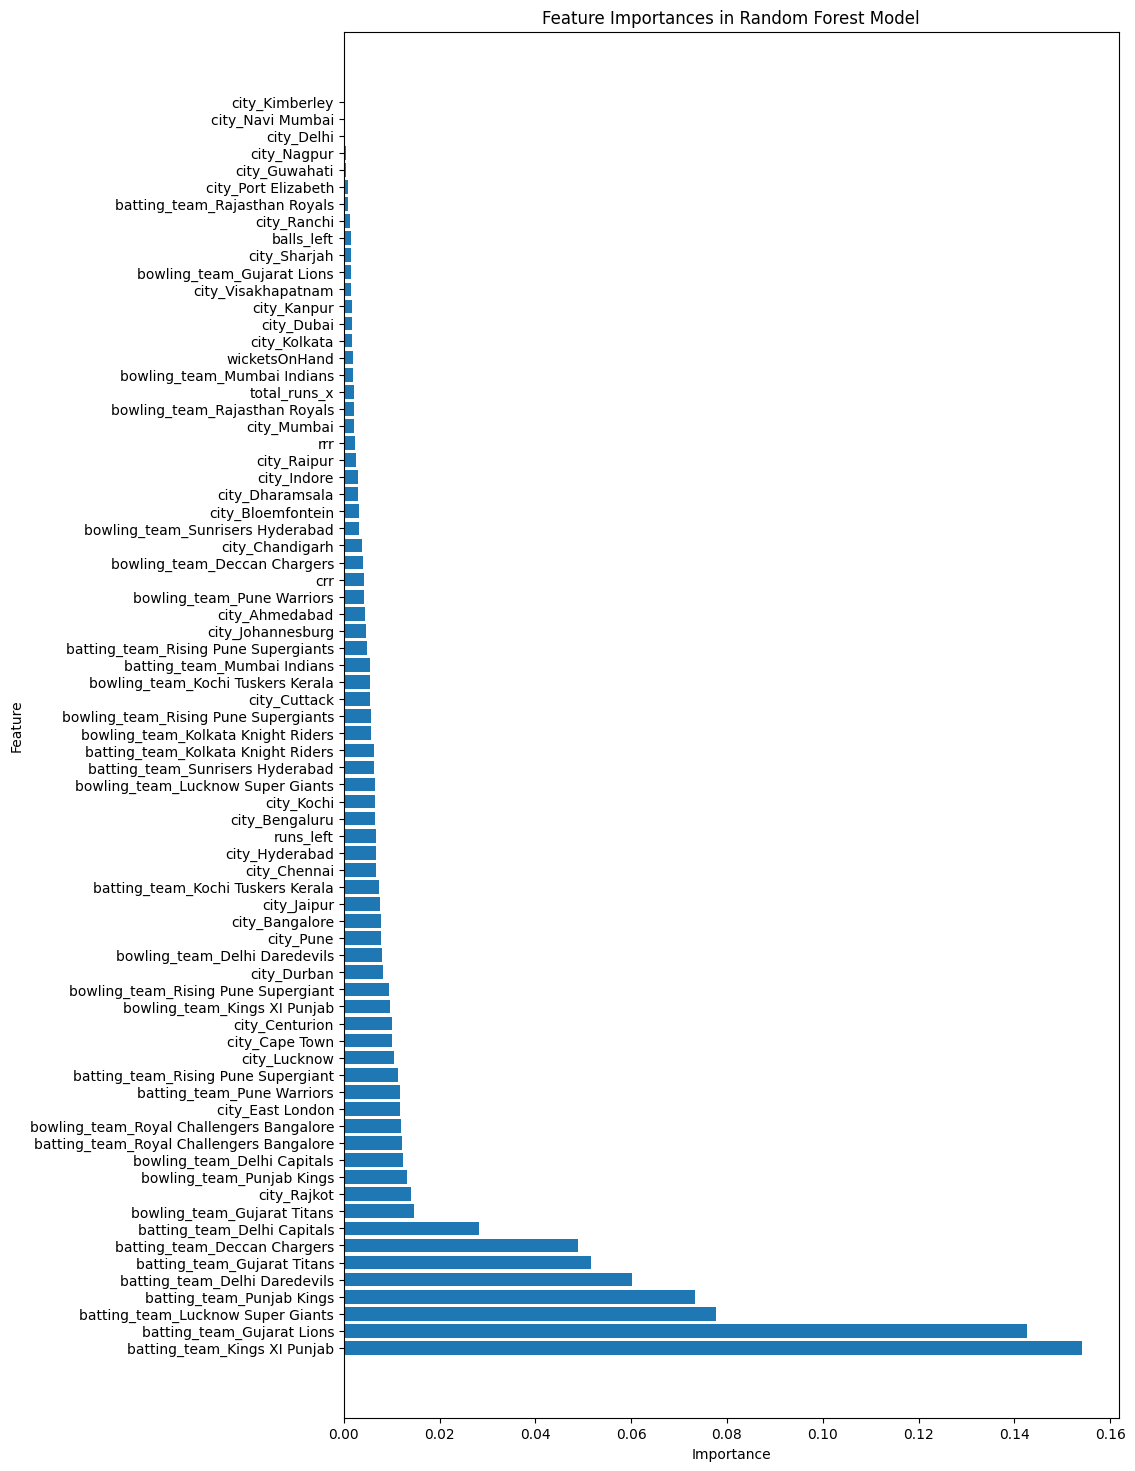

In [110]:
# Get feature importances
importances = rf_model.feature_importances_

# Get the feature names after one-hot encoding
feature_names = transformer.named_transformers_['onehot'].get_feature_names_out(categorical_features)
feature_names = np.concatenate([feature_names, numerical_features])

# Create a DataFrame for easier visualization
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,  # Use the dynamically generated feature names
    'Importance': importances
})

# Sort by importance in descending order
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# ... (Rest of your plotting code)

# Plot the feature importances
plt.figure(figsize=(10, 18))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Model')
plt.show()

## **Analyzing Feature Importances**

Assuming you still have your best_rf_model and transformer objects from the previous steps, run the following code:

In [111]:
# Get feature importances from the best model
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': transformer.get_feature_names_out(),
    'Importance': importances
})

# Sort by importance and display
feature_importances = feature_importances.sort_values('Importance', ascending=False)
print(feature_importances)

                                  Feature  Importance
5                                num__rrr    0.154106
3                       num__total_runs_x    0.142718
8   onehot__batting_team_Delhi Daredevils    0.077614
11   onehot__batting_team_Kings XI Punjab    0.073263
2                      num__wicketsOnHand    0.060077
..                                    ...         ...
48                   onehot__city_Cuttack    0.000556
59                    onehot__city_Kanpur    0.000446
43              onehot__city_Bloemfontein    0.000293
60                 onehot__city_Kimberley    0.000163
54                  onehot__city_Guwahati    0.000029

[74 rows x 2 columns]


## **1. Generate Confusion Matrices**

Assuming you have your trained models and test data (X_test and y_test), use the following code for each model (replace model with the appropriate model object):

In [112]:
from sklearn.metrics import confusion_matrix

# Assuming 'best_rf_model' from your previous code is the model you want to use
model = rf_model

# Predict on the test data
y_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

[[10309     7]
 [    8  8211]]


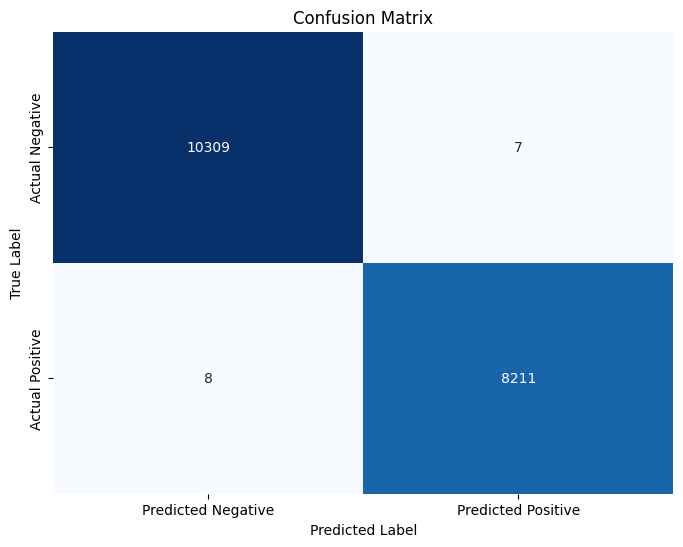

In [113]:
# Assuming you still have 'y_test' and 'y_pred' from your previous code
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## **Model Comparison**

In [114]:


# Replace these with the actual scores you obtained for each model
logistic_regression_accuracy = accuracy_lr # Example value, replace with your actual score
logistic_regression_f1 = f1_lr  # Example value, replace with your actual score

decision_tree_accuracy = accuracy_dt # Example value, replace with your actual score
decision_tree_f1 = f1_dt # Example value, replace with your actual score

random_forest_accuracy = accuracy_rf  # From your tuned Random Forest
random_forest_f1 = f1_rf  # From your tuned Random Forest

# Create a dictionary with the model names and scores
data = {'Model': ['Logistic Regression', 'Decision Tree', 'Tuned Random Forest'],
        'Accuracy': [logistic_regression_accuracy, decision_tree_accuracy, random_forest_accuracy],
        'F1-Score': [logistic_regression_f1, decision_tree_f1, random_forest_f1]}

# Create a pandas DataFrame from the dictionary
comparison_table = pd.DataFrame(data)

# Print the comparison table
print(comparison_table)

                 Model  Accuracy  F1-Score
0  Logistic Regression  0.855031  0.853524
1        Decision Tree  0.993040  0.992951
2  Tuned Random Forest  0.999191  0.999180


# **Prediction**

In [115]:
final_df = final_df.sample(final_df.shape[0])

In [116]:
final_df = final_df[final_df['balls_left'] != 0]

In [117]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wicketsOnHand,total_runs_x,crr,rrr,result,winner
171914,Delhi Daredevils,Mumbai Indians,Delhi,123,62,5,218,9.827586,11.903226,0,0


In [118]:
from sklearn.pipeline import Pipeline

# Assuming 'best_rf_model' is your trained Random Forest model
trained_model_step = ('classifier', rf_model)

# Create a simple pipeline with just the trained model
pipe = Pipeline([
    trained_model_step
])

# Now you can use this pipeline for predictions
predictions = pipe.predict(X_test)

In [119]:
print(predictions)

[1 1 0 ... 1 1 0]


In [120]:
pipe.predict_proba(X_test)[10]

array([0.009, 0.991])

## **Winner Prediction**

In [121]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))


In [122]:
from sklearn.impute import SimpleImputer
# Assuming 'final_df' is your DataFrame
features = ['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
            'wicketsOnHand', 'total_runs_x', 'crr', 'rrr']
target = 'winner'  # Assuming 'winner' is your target variable

X = final_df[features]
y = final_df[target]

# Replace infinite values with a large finite number or NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace with NaN

# Separate categorical and numerical features
categorical_features = ['batting_team', 'bowling_team', 'city']
numerical_features = ['runs_left', 'balls_left', 'wicketsOnHand', 'total_runs_x', 'crr', 'rrr']

# Create the ColumnTransformer
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'),
     categorical_features)
], remainder='passthrough')


# Create the pipeline
from sklearn.preprocessing import RobustScaler
pipelinePred = Pipeline([
       ('transformer', transformer),
       ('imputer', SimpleImputer(strategy='mean')),
       ('scaler', RobustScaler()),  # Add RobustScaler
       ('classifier', LogisticRegression())
   ])
pipelinePred.fit(X, y)

<ipython-input-122-ccea84c0b938>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace with NaN
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver option

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('imputer', SimpleImputer()), ('scaler', RobustScaler()),
                ('classifier', LogisticRegression())])

In [123]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wicketsOnHand','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]  # Ensure no division by zero in 'rrr' calculation

    # Replace infinite values in the entire DataFrame before prediction
    temp_df.replace([np.inf, -np.inf], np.nan, inplace=True)

    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wicketsOnHand'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [124]:
temp_df,target = match_progression(delivery_df,335982,pipelinePred)
temp_df

Target- 222


,end_of_over,runs_after_over,wickets_in_over,lose,win
82493,1,4,0,87.1,12.9
82500,2,5,1,92.8,7.2
82506,3,2,1,96.7,3.3
82513,4,5,0,96.9,3.1
82519,5,8,1,98.2,1.8
82525,6,2,1,99.2,0.8
82531,7,3,0,99.4,0.6
82539,8,9,1,99.7,0.3
82545,9,3,1,99.9,0.1
82553,10,9,1,99.9,0.1


Text(0.5, 1.0, 'Target-222')

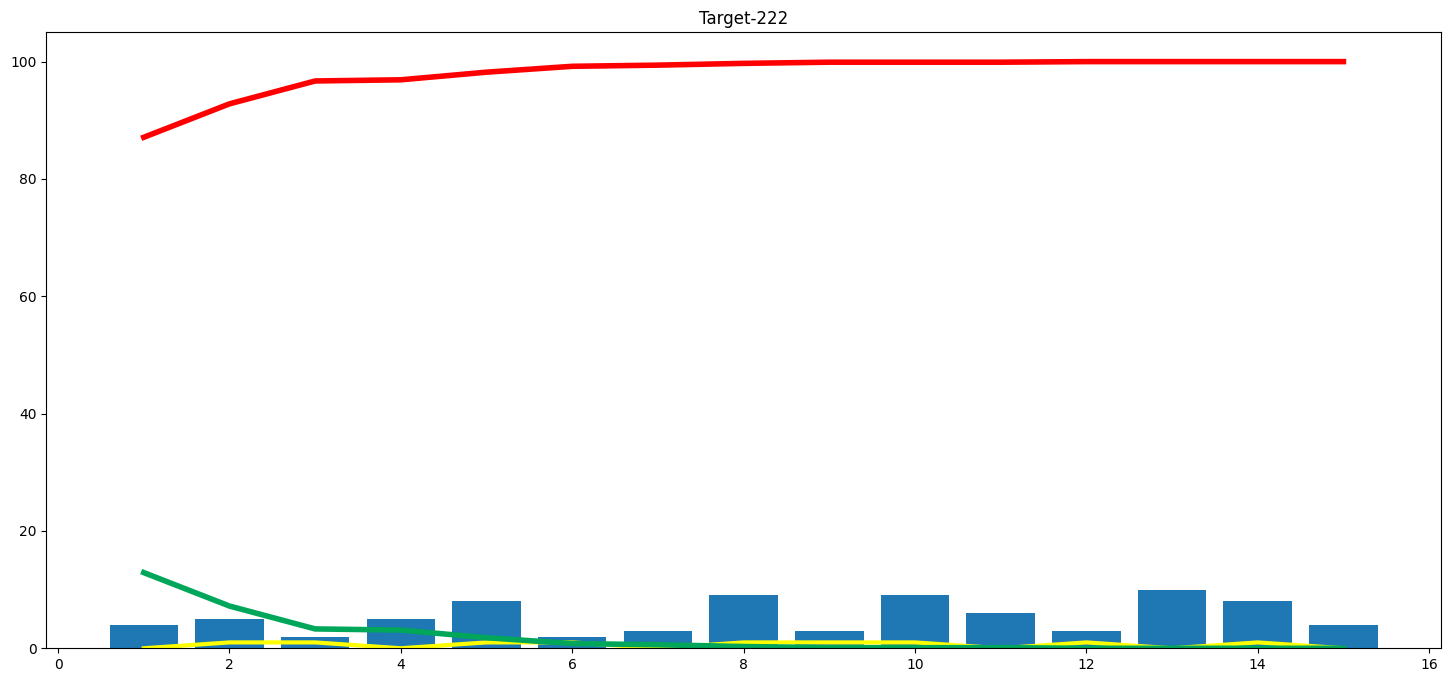

In [125]:
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [126]:
delivery_df.sample()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,noball_runs,penalty_runs,batsman,current_score,runs_left,balls_left,wicketsOnHand,crr,rrr,result
43328,548353,Kolkata,Kolkata Knight Riders,150,2,Pune Warriors,Kolkata Knight Riders,4,1,MK Pandey,...,0.0,0.0,PA Patel,29,121,101,8,9.157895,7.188119,0


In [127]:
temp_df,target = match_progression(delivery_df,548306,pipelinePred)
temp_df

Target- 112


,end_of_over,runs_after_over,wickets_in_over,lose,win
112349,1,1,0,12.0,88.0
112355,2,10,0,9.0,91.0
112362,3,12,0,6.1,93.9
112369,4,11,0,4.2,95.8
112375,5,3,0,4.2,95.8
112381,6,16,0,2.2,97.8
112387,7,8,0,1.6,98.4
112393,8,8,1,2.3,97.7
112399,9,3,2,7.3,92.7
112405,10,4,0,6.6,93.4


Text(0.5, 1.0, 'Target-112')

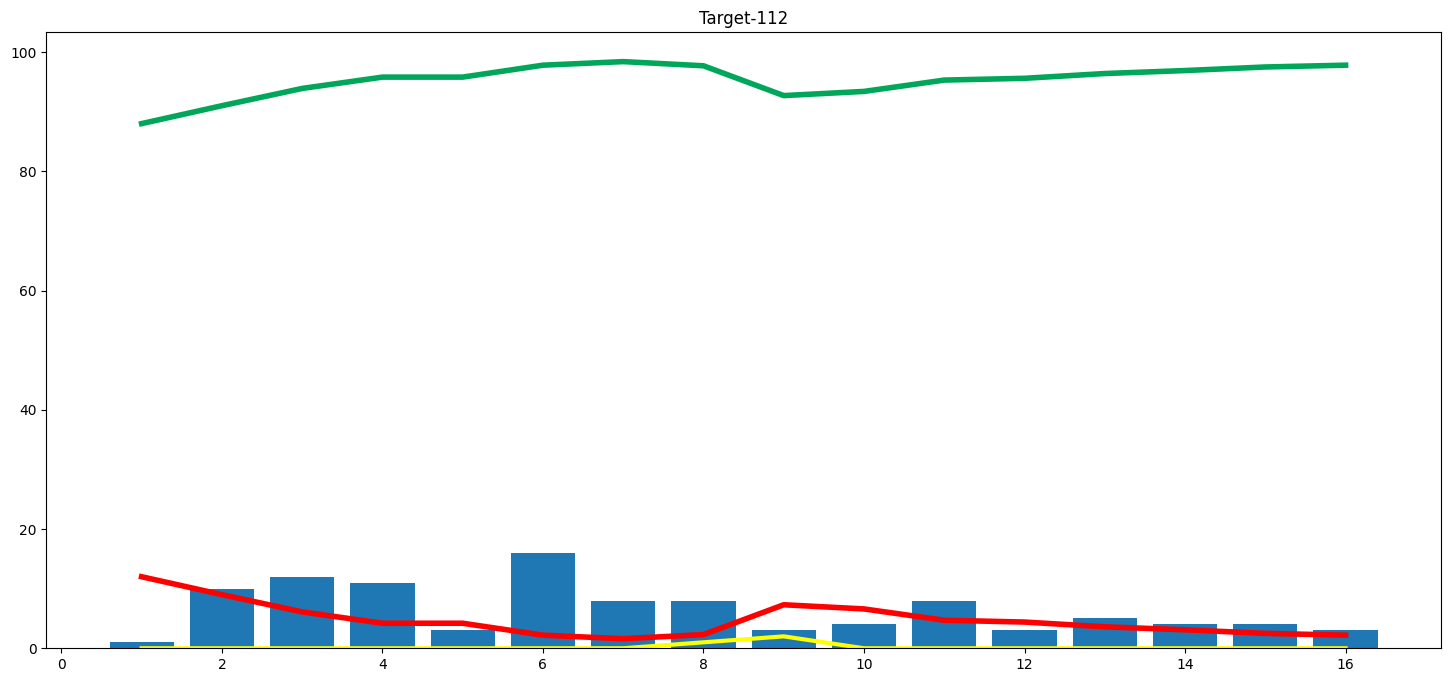

In [128]:
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [129]:
delivery_df.sample()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,noball_runs,penalty_runs,batsman,current_score,runs_left,balls_left,wicketsOnHand,crr,rrr,result
58095,598047,Jaipur,Rajasthan Royals,178,2,Rajasthan Royals,Pune Warriors,12,1,AM Rahane,...,0.0,0.0,SD Chitnis,100,78,53,9,8.955224,8.830189,1


In [130]:
temp_df,target = match_progression(delivery_df,829723,pipelinePred)
temp_df

Target- 165


,end_of_over,runs_after_over,wickets_in_over,lose,win
38485,1,6,0,32.9,67.1
38491,2,5,0,31.9,68.1
38499,3,10,0,26.4,73.6
38505,4,12,0,19.9,80.1
38511,5,3,1,33.4,66.6
38517,6,2,0,36.4,63.6
38524,7,6,0,35.1,64.9
38531,8,9,0,30.5,69.5
38537,9,4,1,47.1,52.9
38543,10,8,1,59.3,40.7


Text(0.5, 1.0, 'Target-165')

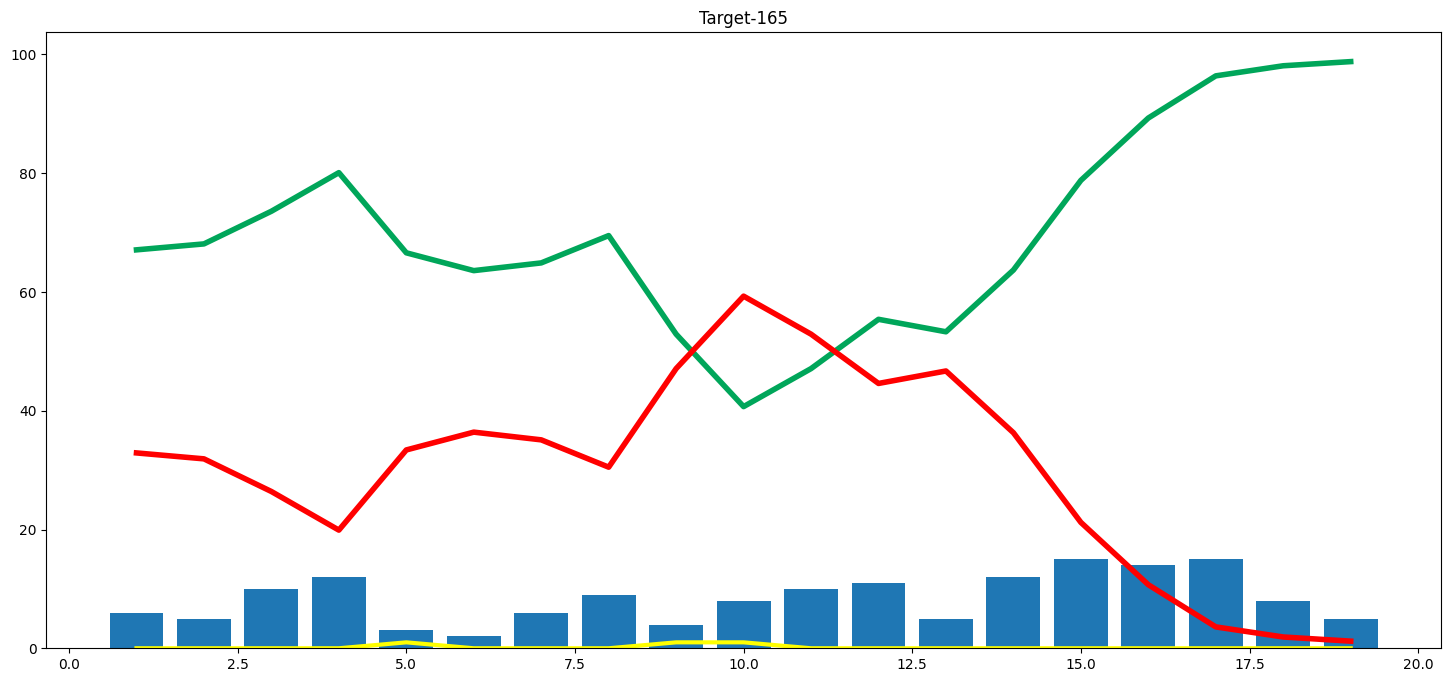

In [131]:
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))